In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier,Pool
from sklearn.metrics import roc_auc_score

In [2]:
import pandas as pd

# 최대 줄 수 설정
pd.set_option('display.max_rows', 500)

# 최대 열 수 설정
pd.set_option('display.max_columns', 500)

# 표시할 가로의 길이
pd.set_option('display.width', 1000)

In [3]:
# 데이터 불러오기
dataset = pd.read_csv("../Dataset/train.csv")
dataset.head()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,country,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,USA,3,553,6,4.0,3.0,5.0,1.0,3.0,5.0,5.0,3.0,5.0,3.0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2.0,1,3.0,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,1.0,4.0,5.0,3.0,1.0,2.0,4.0,5.0,1.0,3.0,1.0,1.0,5.0,3.0,2.0,5.0,USA,5,85,120,4.0,2.0,3.0,5.0,3.0,2.0,5.0,1.0,2.0,2.0,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,1,4.0,2,2.0,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,2.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,5.0,2.0,2.0,1.0,2.0,4.0,2.0,5.0,NLD,9,108,100,1.0,2.0,3.0,1.0,5.0,5.0,3.0,4.0,5.0,2.0,1,1,0,1,1,0,1,1,0,1,0,0,1,1,1,1,2.0,1,1.0,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,5.0,2.0,2.0,4.0,4.0,2.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,2.0,USA,2,121,139,3.0,3.0,3.0,4.0,5.0,3.0,4.0,4.0,3.0,3.0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1.0,3,1.0,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,4.0,4.0,3.0,5.0,5.0,2.0,4.0,1.0,4.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0,ITA,3,640,216,3.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,2.0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,1.0,2,2.0,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0


### - Preprocessing
1. null 값
    - Q1~ Q26 , TIPI1 ~ TIPI10  : 0으로 대체
    - 
2. 이상치(나이, familysize)
    - age : 123, 336, 545, 722, 38822  ( age > 100 인 값 제거)
    - familysize : 2919 제거
3. country 아예 제거

In [4]:
processed_dataset = dataset.drop(['index'], axis=1).copy()

In [5]:
question_col = processed_dataset.columns[0:26]
processed_dataset[question_col] = processed_dataset[question_col].fillna(0)

In [6]:
TIPI1 = processed_dataset.columns[30:40]
processed_dataset[TIPI1] = processed_dataset[TIPI1].fillna(0)

In [7]:
processed_dataset = processed_dataset.drop(['country'], axis=1)

In [8]:
remove_row1 = processed_dataset[processed_dataset['age'] > 100].index
processed_dataset = processed_dataset.drop(remove_row1)

In [9]:
remove_row2 = processed_dataset[processed_dataset['familysize'] == 2919].index
processed_dataset= processed_dataset.drop(remove_row2)

In [10]:
# 실험
# education, ASD : 결측치 있는 값 삭제하고 해봅니다!
processed_dataset = processed_dataset.dropna(subset = ['education', 'ASD'])

# gender랑 hand, voted도 결측값은 0으로 채우고
processed_dataset['gender'] = processed_dataset['gender'].fillna(0)
processed_dataset['hand'] = processed_dataset['hand'].fillna(0)
processed_dataset['voted'] = processed_dataset['voted'].fillna(0)

#engnat, religion, orientation, familysize 

# 정규화

In [11]:
processed_dataset.isna().sum()

Q1                0
Q2                0
Q3                0
Q4                0
Q5                0
Q6                0
Q7                0
Q8                0
Q9                0
Q10               0
Q11               0
Q12               0
Q13               0
Q14               0
Q15               0
Q16               0
Q17               0
Q18               0
Q19               0
Q20               0
Q21               0
Q22               0
Q23               0
Q24               0
Q25               0
Q26               0
introelapse       0
testelapse        0
surveyelapse      0
TIPI1             0
TIPI2             0
TIPI3             0
TIPI4             0
TIPI5             0
TIPI6             0
TIPI7             0
TIPI8             0
TIPI9             0
TIPI10            0
VCL1              0
VCL2              0
VCL3              0
VCL4              0
VCL5              0
VCL6              0
VCL7              0
VCL8              0
VCL9              0
VCL10             0
VCL11             0


### - Data Split

In [12]:
input_data = processed_dataset.copy()
input_data_y = input_data['nerdiness'].copy()
input_data_X = input_data.drop(['nerdiness'], axis=1)

In [13]:
train_X, test_X, train_y, test_y = train_test_split(
    input_data_X, 
    input_data_y, 
    test_size = 0.2, 
    random_state = 156,
    shuffle=True
)

In [14]:
tr_X, val_X, tr_y, val_y = train_test_split(
    train_X, 
    train_y,
    test_size = 0.1, 
    random_state = 156,
    shuffle = True)

### - Modeling 1. CatBoost

### - Modeling 2. XGBoost

In [25]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [16]:
xgb_model = XGBClassifier(n_estimators = 400, 
                            learning_rate = 0.05,
                            max_depth = 3,
                            eval_metric = 'logloss')

xgb_model.fit(train_X, train_y, verbose = True)

xgb_preds = xgb_model.predict(test_X)
xgb_preds_proba = xgb_model.predict_proba(test_X)[:, 1]

C:\Users\yeada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [17]:
AUC = roc_auc_score(test_y, xgb_preds_proba)
AUC

0.813468758755954

In [18]:
xgb_model = XGBClassifier(n_estimators = 400, 
                            learning_rate = 0.05,
                            max_depth = 3)

evals =[(tr_X, tr_y), (val_X, val_y)]

xgb_model.fit(tr_X, tr_y,
             early_stopping_rounds = 50,
             eval_metric = 'logloss',
             eval_set = evals,
             verbose = True)

xgb_eval_preds = xgb_model.predict(test_X)
xgb_eval_preds_proba = xgb_model.predict_proba(test_X)[:, 1]

[0]	validation_0-logloss:0.68446	validation_1-logloss:0.68446
[1]	validation_0-logloss:0.67658	validation_1-logloss:0.67651
[2]	validation_0-logloss:0.66943	validation_1-logloss:0.66957
[3]	validation_0-logloss:0.66289	validation_1-logloss:0.66324
[4]	validation_0-logloss:0.65680	validation_1-logloss:0.65698
[5]	validation_0-logloss:0.65123	validation_1-logloss:0.65131
[6]	validation_0-logloss:0.64581	validation_1-logloss:0.64620
[7]	validation_0-logloss:0.64082	validation_1-logloss:0.64142
[8]	validation_0-logloss:0.63611	validation_1-logloss:0.63644
[9]	validation_0-logloss:0.63169	validation_1-logloss:0.63239
[10]	validation_0-logloss:0.62755	validation_1-logloss:0.62790
[11]	validation_0-logloss:0.62350	validation_1-logloss:0.62414
[12]	validation_0-logloss:0.61974	validation_1-logloss:0.62072
[13]	validation_0-logloss:0.61611	validation_1-logloss:0.61730
[14]	validation_0-logloss:0.61270	validation_1-logloss:0.61383
[15]	validation_0-logloss:0.60954	validation_1-logloss:0.61075
[1

C:\Users\yeada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[27]	validation_0-logloss:0.57946	validation_1-logloss:0.58449
[28]	validation_0-logloss:0.57759	validation_1-logloss:0.58295
[29]	validation_0-logloss:0.57579	validation_1-logloss:0.58153
[30]	validation_0-logloss:0.57396	validation_1-logloss:0.58035
[31]	validation_0-logloss:0.57227	validation_1-logloss:0.57890
[32]	validation_0-logloss:0.57045	validation_1-logloss:0.57722
[33]	validation_0-logloss:0.56883	validation_1-logloss:0.57587
[34]	validation_0-logloss:0.56729	validation_1-logloss:0.57504
[35]	validation_0-logloss:0.56588	validation_1-logloss:0.57367
[36]	validation_0-logloss:0.56452	validation_1-logloss:0.57263
[37]	validation_0-logloss:0.56313	validation_1-logloss:0.57169
[38]	validation_0-logloss:0.56182	validation_1-logloss:0.57042
[39]	validation_0-logloss:0.56033	validation_1-logloss:0.56915
[40]	validation_0-logloss:0.55899	validation_1-logloss:0.56787
[41]	validation_0-logloss:0.55778	validation_1-logloss:0.56737
[42]	validation_0-logloss:0.55659	validation_1-logloss:

[157]	validation_0-logloss:0.50553	validation_1-logloss:0.53734
[158]	validation_0-logloss:0.50534	validation_1-logloss:0.53733
[159]	validation_0-logloss:0.50508	validation_1-logloss:0.53730
[160]	validation_0-logloss:0.50490	validation_1-logloss:0.53717
[161]	validation_0-logloss:0.50475	validation_1-logloss:0.53712
[162]	validation_0-logloss:0.50449	validation_1-logloss:0.53723
[163]	validation_0-logloss:0.50425	validation_1-logloss:0.53723
[164]	validation_0-logloss:0.50401	validation_1-logloss:0.53724
[165]	validation_0-logloss:0.50375	validation_1-logloss:0.53729
[166]	validation_0-logloss:0.50351	validation_1-logloss:0.53715
[167]	validation_0-logloss:0.50336	validation_1-logloss:0.53709
[168]	validation_0-logloss:0.50314	validation_1-logloss:0.53715
[169]	validation_0-logloss:0.50300	validation_1-logloss:0.53705
[170]	validation_0-logloss:0.50282	validation_1-logloss:0.53695
[171]	validation_0-logloss:0.50271	validation_1-logloss:0.53693
[172]	validation_0-logloss:0.50256	valid

[286]	validation_0-logloss:0.48392	validation_1-logloss:0.53590
[287]	validation_0-logloss:0.48382	validation_1-logloss:0.53587
[288]	validation_0-logloss:0.48367	validation_1-logloss:0.53582
[289]	validation_0-logloss:0.48344	validation_1-logloss:0.53590
[290]	validation_0-logloss:0.48331	validation_1-logloss:0.53590
[291]	validation_0-logloss:0.48325	validation_1-logloss:0.53589
[292]	validation_0-logloss:0.48318	validation_1-logloss:0.53593
[293]	validation_0-logloss:0.48312	validation_1-logloss:0.53600
[294]	validation_0-logloss:0.48293	validation_1-logloss:0.53597
[295]	validation_0-logloss:0.48279	validation_1-logloss:0.53595
[296]	validation_0-logloss:0.48263	validation_1-logloss:0.53610
[297]	validation_0-logloss:0.48245	validation_1-logloss:0.53609
[298]	validation_0-logloss:0.48240	validation_1-logloss:0.53605
[299]	validation_0-logloss:0.48234	validation_1-logloss:0.53607
[300]	validation_0-logloss:0.48209	validation_1-logloss:0.53594
[301]	validation_0-logloss:0.48190	valid

In [19]:
AUC = roc_auc_score(test_y, xgb_eval_preds_proba)
AUC

0.8093854487718315

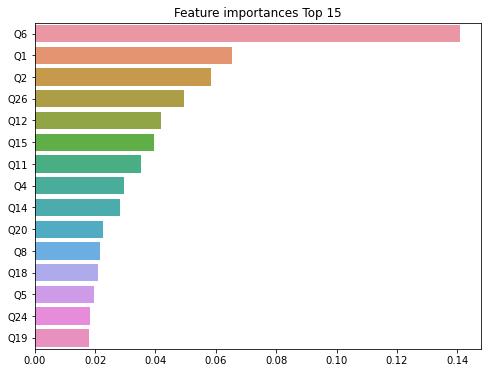

In [20]:
ftr_importances_values = xgb_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=train_X.columns)
ftr_top15 = ftr_importances.sort_values(ascending=False)[:15]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 15')
sns.barplot(x = ftr_top15, y = ftr_top15.index)
plt.show()

### Saving Model

In [21]:
saving_model = xgb_model

In [22]:
import pickle
import joblib
import datetime
path = "../Dataset/"

filename = datetime.datetime.now().strftime("%m%d_%H_%M")
filename = 'notuned_XGB_'+filename
filename

'notuned_XGB_0805_22_48'

In [24]:
joblib.dump(saving_model, path+filename+'.h5') 

['../Dataset/notuned_XGB_0805_22_48.h5']